In [1]:
import pandas as pd
import math
from os import listdir
from os.path import isfile, join
import dask.dataframe as dd
from dask.distributed import Client
from dask.diagnostics import ProgressBar
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [26]:
from os.path import expanduser
from pathlib import Path
home = str(Path.home())
filepath = home+'/teams/DSC180A_FA20_A00/b09systemusagereporting/dataset'
files = [f for f in listdir(filepath) if isfile(join(filepath, f))]
files

['plist_process_resource_util_hist.csv001.gz',
 'plist_process_resource_util_13wks.csv000.gz',
 'batt_info.csv000.gz',
 'frgnd_v2.csv000.gz',
 'plist_process_resource_util_hist.csv003.gz',
 'plist_process_resource_util_hist.csv002.gz',
 'frgnd_backgrnd_apps.csv000.gz',
 'plist_process_resource_util_13wks.csv001.gz',
 'mousewait_all.csv001.gz',
 'system_sysinfo_unique_normalized.csv000.gz',
 'devuse_4known_device.csv001.gz',
 'devuse_4known_device.csv000.gz',
 'hw_metric_histo.csv000.gz',
 'mousewait.csv000.gz',
 'hw_metric_histo.csv001.gz',
 'batt_acdc_events.csv000.gz']

## Plist

In [30]:
c = Client()
plist_hist_path = filepath + '/plist_process_resource_util_hist.csv001.gz'
plist_hist = pd.read_csv(plist_hist_path, nrows=3000000, compression='gzip', sep='\t')
plist_hist['key'] = plist_hist['guid'] + ' '+plist_hist['batch_id']

/opt/conda/lib/python3.7/site-packages/distributed/node.py:155: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 41085 instead
  http_address["port"], self.http_server.port


In [31]:
plist_hist.head()

,load_ts,batch_id,audit_zip,audit_internal_path,guid,interval_start_utc,interval_end_utc,interval_local_start,interval_local_end,ts,...,hard_page_faults,disk_read_iobytes,disk_write_iobytes,tcpip_sendbytes,tcpip_receivebytes,udpip_sendbytes,udpip_receivebytes,avg_memory,peak_memory,key
0,2019-10-27 04:18:53,20191026-210555,2019102613-i-0728cf8ab79db9e58-BWQBS6dNb6kotNg...,V8PLIST_20191026164535.V8,189edb26714340028140631a83a09147,2019-10-25 13:43:43,2019-10-26 13:45:52,2019-10-25 16:43:43,2019-10-26 16:45:52,2019-10-25 16:45:43,...,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,189edb26714340028140631a83a09147 20191026-210555
1,2019-10-26 04:08:28,20191025-210226,2019102520-i-04a9a906e1cd5620c-kJTLQLoksOPH6dx...,V8PLIST_20191025220758.V8,1a5db163364841b58ee19fb2fa567c45,2019-10-24 20:07:46,2019-10-25 20:08:15,2019-10-24 22:07:46,2019-10-25 22:08:15,2019-10-25 00:02:18,...,52.0,0.0,0.0,0.0,0.0,0.0,0.0,2987.5,8312.0,1a5db163364841b58ee19fb2fa567c45 20191025-210226
2,2019-10-26 04:08:28,20191025-210226,2019102520-i-04a9a906e1cd5620c-kJTLQLoksOPH6dx...,V8PLIST_20191025220758.V8,1a5db163364841b58ee19fb2fa567c45,2019-10-24 20:07:46,2019-10-25 20:08:15,2019-10-24 22:07:46,2019-10-25 22:08:15,2019-10-25 22:08:09,...,5.0,96256.0,0.0,0.0,0.0,0.0,0.0,27927.0,31660.0,1a5db163364841b58ee19fb2fa567c45 20191025-210226
3,2019-10-26 04:08:28,20191025-210226,2019102520-i-04a9a906e1cd5620c-kJTLQLoksOPH6dx...,V8PLIST_20191025220758.V8,1a5db163364841b58ee19fb2fa567c45,2019-10-24 20:07:46,2019-10-25 20:08:15,2019-10-24 22:07:46,2019-10-25 22:08:15,2019-10-25 12:26:00,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,27859.0,32628.0,1a5db163364841b58ee19fb2fa567c45 20191025-210226
4,2019-10-26 04:08:28,20191025-210226,2019102520-i-04a9a906e1cd5620c-kJTLQLoksOPH6dx...,V8PLIST_20191025220758.V8,1a5db163364841b58ee19fb2fa567c45,2019-10-24 20:07:46,2019-10-25 20:08:15,2019-10-24 22:07:46,2019-10-25 22:08:15,2019-10-25 00:02:18,...,55.0,225792.0,0.0,0.0,0.0,0.0,0.0,10298.0,29216.0,1a5db163364841b58ee19fb2fa567c45 20191025-210226


## Wait

In [32]:
wait_path = filepath + '/mousewait.csv000.gz'
wait = pd.read_csv(wait_path, nrows=500000, compression='gzip', sep='\t')
wait.head()

,load_ts,batch_id,audit_zip,audit_internal_path,guid,interval_start_utc,interval_end_utc,interval_local_start,interval_local_end,ts,dt,wait_msecs
0,2019-10-16 04:14:10,20191015-210431,2019101508-i-04a9a906e1cd5620c-mwKSBh69JN7Be4d...,V8WAIT_20191014093021.V8,000191350c96450d9a3abe474651ca64,2019-10-12 08:04:27,2019-10-14 08:30:35,2019-10-12 09:04:27,2019-10-14 09:30:35,2019-10-12 14:05:49,2019-10-12,1200
1,2019-10-16 04:14:10,20191015-210431,2019101508-i-04a9a906e1cd5620c-39jBWoAs1p6xBP9...,V8WAIT_20191015093025.V8,000191350c96450d9a3abe474651ca64,2019-10-14 08:31:01,2019-10-15 08:30:52,2019-10-14 09:31:01,2019-10-15 09:30:52,2019-10-14 15:15:47,2019-10-14,2401
2,2019-10-16 04:14:10,20191015-210431,2019101508-i-04a9a906e1cd5620c-39jBWoAs1p6xBP9...,V8WAIT_20191015093025.V8,000191350c96450d9a3abe474651ca64,2019-10-14 08:31:01,2019-10-15 08:30:52,2019-10-14 09:31:01,2019-10-15 09:30:52,2019-10-14 17:15:38,2019-10-14,5000
3,2019-10-16 04:14:10,20191015-210431,2019101508-i-04a9a906e1cd5620c-39jBWoAs1p6xBP9...,V8WAIT_20191015093025.V8,000191350c96450d9a3abe474651ca64,2019-10-14 08:31:01,2019-10-15 08:30:52,2019-10-14 09:31:01,2019-10-15 09:30:52,2019-10-14 17:19:44,2019-10-14,2000
4,2019-10-16 04:14:10,20191015-210431,2019101508-i-04a9a906e1cd5620c-39jBWoAs1p6xBP9...,V8WAIT_20191015093025.V8,000191350c96450d9a3abe474651ca64,2019-10-14 08:31:01,2019-10-15 08:30:52,2019-10-14 09:31:01,2019-10-15 09:30:52,2019-10-14 17:19:46,2019-10-14,3300


## Combine

In [33]:
plist_guids = plist_hist['guid'].value_counts().index
print('plist_guids: '+ str(len(plist_guids)))

plist_guids: 14539


In [34]:
wait_guids = wait['guid'].value_counts().index
len(wait_guids)

1175

In [35]:
common_guid = list(set(plist_hist['guid'].value_counts().index) & set(wait['guid'].value_counts().index))
len(common_guid)

100

We can see that there are 100 common guid between wait dataset the the plist

In [36]:
print('plist_guids: '+ str(len(plist_guids)))
print('wait_guids: '+ str(len(wait_guids)))
print('common_guids: '+ str(len(common_guid)))

plist_guids: 14539
wait_guids: 1175
common_guids: 100


In [38]:
plist_user_one = plist_hist[plist_hist['guid'] == common_guid[0]]
plist_user_one.head().transpose()

,367616,367617,367618,367619,367620
load_ts,2019-10-28 04:09:00,2019-10-28 04:09:00,2019-10-26 04:08:28,2019-10-26 04:08:28,2019-10-28 04:09:00
batch_id,20191027-210225,20191027-210225,20191025-210226,20191025-210226,20191027-210225
audit_zip,2019102710-i-0728cf8ab79db9e58-qpx3HDZlEDhGxEF...,2019102710-i-0728cf8ab79db9e58-qpx3HDZlEDhGxEF...,2019102519-i-040171543e1bfef37-E1cm72WhUuG9jYN...,2019102519-i-040171543e1bfef37-E1cm72WhUuG9jYN...,2019102710-i-0728cf8ab79db9e58-qpx3HDZlEDhGxEF...
audit_internal_path,V8PLIST_20191027112328.V8,V8PLIST_20191027112328.V8,V8PLIST_20191025214655.V8,V8PLIST_20191025214655.V8,V8PLIST_20191027112328.V8
guid,0029ba4b7aba4696a0292d661507f29f,0029ba4b7aba4696a0292d661507f29f,0029ba4b7aba4696a0292d661507f29f,0029ba4b7aba4696a0292d661507f29f,0029ba4b7aba4696a0292d661507f29f
interval_start_utc,2019-10-25 19:47:09,2019-10-25 19:47:09,2019-10-24 14:14:08,2019-10-24 14:14:08,2019-10-25 19:47:09
interval_end_utc,2019-10-27 10:23:37,2019-10-27 10:23:37,2019-10-25 19:47:09,2019-10-25 19:47:09,2019-10-27 10:23:37
interval_local_start,2019-10-25 21:47:09,2019-10-25 21:47:09,2019-10-24 16:14:09,2019-10-24 16:14:09,2019-10-25 21:47:09
interval_local_end,2019-10-27 11:23:37,2019-10-27 11:23:37,2019-10-25 21:47:09,2019-10-25 21:47:09,2019-10-27 11:23:37
ts,2019-10-25 21:47:51,2019-10-25 21:47:40,2019-10-25 21:46:55,2019-10-25 21:46:56,2019-10-25 21:47:38


In [39]:
wait_user_one = wait[wait['guid'] == common_guid[0]]
wait_user_one.head()

,load_ts,batch_id,audit_zip,audit_internal_path,guid,interval_start_utc,interval_end_utc,interval_local_start,interval_local_end,ts,dt,wait_msecs
348473,2020-01-04 04:07:57,20200103-200225,2020010321-i-040171543e1bfef37-WyvK7uad0MxDCTB...,V8WAIT_20200103224511.V8,0029ba4b7aba4696a0292d661507f29f,2020-01-01 11:21:34,2020-01-03 21:45:28,2020-01-01 12:21:34,2020-01-03 22:45:28,2020-01-01 12:30:51,2020-01-01,2493
348474,2020-04-28 17:19:32,20200428-091659,2020042815-i-040171543e1bfef37-7GsfmrIe7kQTeim...,V8WAIT_20200428175227.V8,0029ba4b7aba4696a0292d661507f29f,2020-04-26 08:07:55,2020-04-28 15:52:46,2020-04-26 10:07:55,2020-04-28 17:52:46,2020-04-26 10:09:38,2020-04-26,3893
348475,2020-04-28 17:19:32,20200428-091659,2020042815-i-040171543e1bfef37-7GsfmrIe7kQTeim...,V8WAIT_20200428175227.V8,0029ba4b7aba4696a0292d661507f29f,2020-04-26 08:07:55,2020-04-28 15:52:46,2020-04-26 10:07:55,2020-04-28 17:52:46,2020-04-26 10:10:03,2020-04-26,5096
348476,2020-04-28 17:19:32,20200428-091659,2020042815-i-040171543e1bfef37-7GsfmrIe7kQTeim...,V8WAIT_20200428175227.V8,0029ba4b7aba4696a0292d661507f29f,2020-04-26 08:07:55,2020-04-28 15:52:46,2020-04-26 10:07:55,2020-04-28 17:52:46,2020-04-26 10:10:08,2020-04-26,6600
348477,2020-04-28 17:19:32,20200428-091659,2020042815-i-040171543e1bfef37-7GsfmrIe7kQTeim...,V8WAIT_20200428175227.V8,0029ba4b7aba4696a0292d661507f29f,2020-04-26 08:07:55,2020-04-28 15:52:46,2020-04-26 10:07:55,2020-04-28 17:52:46,2020-04-26 10:10:16,2020-04-26,4502


In [40]:
temp = pd.to_datetime(wait_user_one['interval_end_utc']) - pd.to_datetime(wait_user_one['interval_start_utc'])

In [41]:
temp.apply(lambda x: x.seconds).value_counts()

27891    7
37434    1
dtype: int64

## Feature Process

In [42]:
plist_hist['common'] = plist_hist['guid'].apply(lambda x: x in common_guid)
plist_hist_common = plist_hist[plist_hist['common']]

We only select the row that has the common guid in it. This will help us reduce the size of the data

In [43]:
wait['common'] = wait['guid'].apply(lambda x: x in common_guid)
wait_common = wait[wait['common']]

In [44]:
plist_hist_common['key'] = plist_hist_common['guid'] + plist_hist_common['batch_id']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
wait_common['key'] = wait_common['guid'] + wait_common['batch_id']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
wait_common = wait_common[['key', 'wait_msecs']]

In [47]:
merged_df = pd.merge(plist_hist_common, wait_common, on = 'key')

In [48]:
pro_df = merged_df.groupby('key').sum()

In [49]:
cor = pro_df.corr()['wait_msecs']
cor[cor > 0.4].drop(['common', 'wait_msecs'])

num_runs            0.464598
ttl_run_tm_in_ms    0.647657
page_faults         0.716664
peak_memory         0.441339
Name: wait_msecs, dtype: float64

Text(0.5, 0, 'log of num runs')

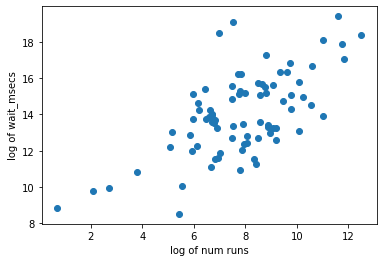

In [50]:
plt.scatter(np.log(pro_df['num_runs']),np.log(pro_df['wait_msecs']),)
plt.ylabel("log of wait_msecs",fontsize=10)
plt.xlabel("log of num runs",fontsize=10)

Text(0.5, 0, 'log of ttl_run_tm_in_ms')

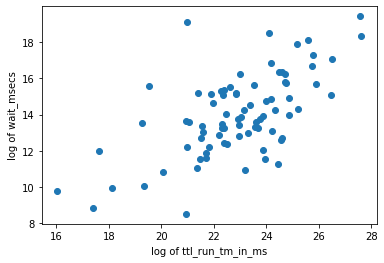

In [51]:
plt.scatter(np.log(pro_df['ttl_run_tm_in_ms']),np.log(pro_df['wait_msecs']))
plt.ylabel("log of wait_msecs",fontsize=10)
plt.xlabel("log of ttl_run_tm_in_ms",fontsize=10)

## All

In [52]:
from os.path import expanduser
from pathlib import Path
home = str(Path.home())
filepath = home+'/teams/DSC180A_FA20_A00/b09systemusagereporting/dataset'
wait_all_path = filepath + '/mousewait_all.csv001.gz'
wait_all = pd.read_csv(wait_all_path, nrows=500000, compression='gzip',sep = '\x01', error_bad_lines = False)
wait_all.head()

,load_ts,batch_id,audit_zip,audit_internal_path,guid,interval_start_utc,interval_end_utc,interval_local_start,interval_local_end,ts,...,after_cpuutil_max,after_harddpf_mean,after_harddpf_min,after_harddpf_max,after_diskutil_mean,after_diskutil_min,after_diskutil_max,after_networkutil_mean,after_networkutil_min,after_networkutil_max
0,2020-02-17 04:14:15,20200216-200527,2020021515-i-0728cf8ab79db9e58-0PQzvFr53c0KKhn...,V8WAIT_20200215225003.V8,ec601c5d312847a68f2346944dbf7433,2020-02-14 15:49:11,2020-02-15 15:51:30,2020-02-14 22:49:11,2020-02-15 22:51:30,2020-02-14 23:06:07,...,63.653845,32975.522486,14414.729578,109379.546298,6.996697e+06,4.424675e+06,1.669766e+07,160113.666050,10555.214421,7.005273e+05
1,2020-02-17 04:14:15,20200216-200527,2020021515-i-0728cf8ab79db9e58-0PQzvFr53c0KKhn...,V8WAIT_20200215225003.V8,ec601c5d312847a68f2346944dbf7433,2020-02-14 15:49:11,2020-02-15 15:51:30,2020-02-14 22:49:11,2020-02-15 22:51:30,2020-02-14 23:36:14,...,52.734400,23418.144640,1118.973930,78629.416961,1.603042e+06,1.966386e+04,8.046177e+06,10087.796235,2286.012122,1.363990e+04
2,2020-02-17 04:14:15,20200216-200527,2020021515-i-0728cf8ab79db9e58-0PQzvFr53c0KKhn...,V8WAIT_20200215225003.V8,ec601c5d312847a68f2346944dbf7433,2020-02-14 15:49:11,2020-02-15 15:51:30,2020-02-14 22:49:11,2020-02-15 22:51:30,2020-02-15 00:17:33,...,58.965876,23912.363263,1737.067429,116903.898039,2.141939e+06,3.277305e+04,9.064737e+06,12314.223147,8185.584133,2.340836e+04
3,2020-02-17 04:14:15,20200216-200527,2020021515-i-0728cf8ab79db9e58-0PQzvFr53c0KKhn...,V8WAIT_20200215225003.V8,ec601c5d312847a68f2346944dbf7433,2020-02-14 15:49:11,2020-02-15 15:51:30,2020-02-14 22:49:11,2020-02-15 22:51:30,2020-02-15 00:53:26,...,34.951303,21957.671636,530.575343,113020.664224,1.552810e+06,3.153773e+04,6.460560e+06,8264.801956,2176.351066,1.344384e+04
4,2020-02-17 04:14:15,20200216-200527,2020021515-i-0728cf8ab79db9e58-0PQzvFr53c0KKhn...,V8WAIT_20200215225003.V8,ec601c5d312847a68f2346944dbf7433,2020-02-14 15:49:11,2020-02-15 15:51:30,2020-02-14 22:49:11,2020-02-15 22:51:30,2020-02-15 21:02:01,...,64.355809,46216.966367,22111.284672,110219.798541,6.959890e+06,2.837489e+06,1.672723e+07,474115.187358,22557.075868,2.653365e+06


In [53]:
subset_wait_all = wait_all.head(1000)

Since the data is really big, We decided to use a small sample for our data cleaning.

In [54]:
subset_wait_all.transpose()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
load_ts,2020-02-17 04:14:15,2020-02-17 04:14:15,2020-02-17 04:14:15,2020-02-17 04:14:15,2020-02-17 04:14:15,2020-02-17 04:14:15,2020-02-17 04:14:15,2020-02-17 04:14:15,2020-02-17 04:14:15,2020-02-17 04:14:15,...,2020-11-28 03:11:24,2020-11-28 03:11:24,2020-11-28 03:11:24,2020-11-28 03:11:24,2020-11-28 03:11:24,2020-11-28 03:11:24,2020-11-28 03:11:24,2020-11-28 03:11:24,2020-11-28 03:11:24,2020-11-28 03:11:24
batch_id,20200216-200527,20200216-200527,20200216-200527,20200216-200527,20200216-200527,20200216-200527,20200216-200527,20200216-200527,20200216-200527,20200216-200527,...,20201127-190229,20201127-190229,20201127-190229,20201127-190229,20201127-190229,20201127-190229,20201127-190229,20201127-190229,20201127-190229,20201127-190229
audit_zip,2020021515-i-0728cf8ab79db9e58-0PQzvFr53c0KKhn...,2020021515-i-0728cf8ab79db9e58-0PQzvFr53c0KKhn...,2020021515-i-0728cf8ab79db9e58-0PQzvFr53c0KKhn...,2020021515-i-0728cf8ab79db9e58-0PQzvFr53c0KKhn...,2020021515-i-0728cf8ab79db9e58-0PQzvFr53c0KKhn...,2020021515-i-0728cf8ab79db9e58-0PQzvFr53c0KKhn...,2020021515-i-0728cf8ab79db9e58-0PQzvFr53c0KKhn...,2020021615-i-04a9a906e1cd5620c-YNVr6Q1BYXuv83g...,2020021615-i-04a9a906e1cd5620c-YNVr6Q1BYXuv83g...,2020021615-i-04a9a906e1cd5620c-YNVr6Q1BYXuv83g...,...,2020112708-i-04a9a906e1cd5620c-kVfiEtI9iDkHUdx...,2020112708-i-04a9a906e1cd5620c-kVfiEtI9iDkHUdx...,2020112708-i-04a9a906e1cd5620c-kVfiEtI9iDkHUdx...,2020112708-i-04a9a906e1cd5620c-kVfiEtI9iDkHUdx...,2020112708-i-04a9a906e1cd5620c-kVfiEtI9iDkHUdx...,2020112708-i-04a9a906e1cd5620c-kVfiEtI9iDkHUdx...,2020112708-i-04a9a906e1cd5620c-kVfiEtI9iDkHUdx...,2020112708-i-04a9a906e1cd5620c-kVfiEtI9iDkHUdx...,2020112708-i-04a9a906e1cd5620c-kVfiEtI9iDkHUdx...,2020112708-i-04a9a906e1cd5620c-kVfiEtI9iDkHUdx...
audit_internal_path,V8WAIT_20200215225003.V8,V8WAIT_20200215225003.V8,V8WAIT_20200215225003.V8,V8WAIT_20200215225003.V8,V8WAIT_20200215225003.V8,V8WAIT_20200215225003.V8,V8WAIT_20200215225003.V8,V8WAIT_20200216225134.V8,V8WAIT_20200216225134.V8,V8WAIT_20200216225134.V8,...,V8WAIT_20201127094151.V8,V8WAIT_20201127094151.V8,V8WAIT_20201127094151.V8,V8WAIT_20201127094151.V8,V8WAIT_20201127094151.V8,V8WAIT_20201127094151.V8,V8WAIT_20201127094151.V8,V8WAIT_20201127094151.V8,V8WAIT_20201127094151.V8,V8WAIT_20201127094151.V8
guid,ec601c5d312847a68f2346944dbf7433,ec601c5d312847a68f2346944dbf7433,ec601c5d312847a68f2346944dbf7433,ec601c5d312847a68f2346944dbf7433,ec601c5d312847a68f2346944dbf7433,ec601c5d312847a68f2346944dbf7433,ec601c5d312847a68f2346944dbf7433,ec601c5d312847a68f2346944dbf7433,ec601c5d312847a68f2346944dbf7433,ec601c5d312847a68f2346944dbf7433,...,c75cd100df78461cb063072f158dbacb,c75cd100df78461cb063072f158dbacb,c75cd100df78461cb063072f158dbacb,c75cd100df78461cb063072f158dbacb,c75cd100df78461cb063072f158dbacb,c75cd100df78461cb063072f158dbacb,c75cd100df78461cb063072f158dbacb,c75cd100df78461cb063072f158dbacb,c75cd100df78461cb063072f158dbacb,c75cd100df78461cb063072f158dbacb
interval_start_utc,2020-02-14 15:49:11,2020-02-14 15:49:11,2020-02-14 15:49:11,2020-02-14 15:49:11,2020-02-14 15:49:11,2020-02-14 15:49:11,2020-02-14 15:49:11,2020-02-15 15:51:29,2020-02-15 15:51:29,2020-02-15 15:51:29,...,2020-11-26 08:40:34,2020-11-26 08:40:34,2020-11-26 08:40:34,2020-11-26 08:40:34,2020-11-26 08:40:34,2020-11-26 08:40:34,2020-11-26 08:40:34,2020-11-26 08:40:34,2020-11-26 08:40:34,2020-11-26 08:40:34
interval_end_utc,2020-02-15 15:51:30,2020-02-15 15:51:30,2020-02-15 15:51:30,2020-02-15 15:51:30,2020-02-15 15:51:30,2020-02-15 15:51:30,2020-02-15 15:51:30,2020-02-16 15:52:46,2020-02-16 15:52:46,2020-02-16 15:52:46,...,2020-11-27 08:42:06,2020-11-27 08:42:06,2020-11-27 08:42:06,2020-11-27 08:42:06,2020-11-27 08:42:06,2020-11-27 08:42:06,2020-11-27 08:42:06,2020-11-27 08:42:06,2020-11-27 08:42:06,2020-11-27 08:42:06
interval_local_start,2020-02-14 22:49:11,2020-02-14 22:49:11,2020-02-14 22:49:11,2020-02-14 22:49:11,2020-02-14 22:49:11,2020-02-14 22:49:1

Text(0, 0.5, 'Count')

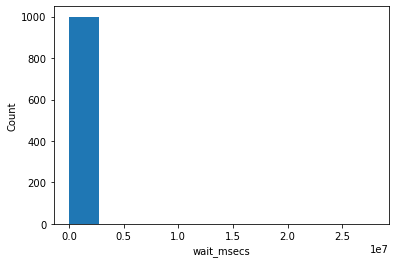

In [55]:
plt.hist(subset_wait_all.wait_msecs)
plt.xlabel("wait_msecs",fontsize=10)
plt.ylabel("Count",fontsize=10)

As you can see majority of the data is are between 0 and 10282.189.

In [56]:
subset_wait_all.wait_msecs.value_counts(bins = 3000)

(-26842.567, 10282.189]         973
(10282.189, 19563.377]           13
(19563.377, 28844.566]            8
(56688.132, 65969.321]            2
(28844.566, 38125.755]            2
                               ... 
(18489128.824, 18498410.013]      0
(18479847.635, 18489128.824]      0
(18470566.447, 18479847.635]      0
(18461285.258, 18470566.447]      0
(13913502.811, 13922784.0]        0
Name: wait_msecs, Length: 3000, dtype: int64

In [57]:
cpu_util_threshold = 100
wait_threshold = 1E4
subset_one = subset_wait_all[['before_cpuutil_max', 'wait_msecs', 'before_harddpf_max', 'before_diskutil_max', 'before_networkutil_max']]
subset_one = subset_one[subset_one.before_cpuutil_max < cpu_util_threshold]
subset_one = subset_one[subset_one.wait_msecs < wait_threshold]
subset_one['before_harddpf_max'] = np.log(subset_one['before_harddpf_max'])
subset_one['before_diskutil_max'] = np.log(subset_one['before_diskutil_max'])
subset_one['before_networkutil_max'] = np.log(subset_one['before_networkutil_max'])

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


We filter out the data that have the wait time that is too large.

In [58]:
subset_one.wait_msecs.value_counts(bins = 10)

(992.202, 1880.7]    428
(3640.1, 4519.8]     153
(2760.4, 3640.1]     141
(5399.5, 6279.2]      68
(6279.2, 7158.9]      47
(4519.8, 5399.5]      45
(1880.7, 2760.4]      41
(8038.6, 8918.3]      23
(8918.3, 9798.0]      10
(7158.9, 8038.6]      10
Name: wait_msecs, dtype: int64

We see that most of the data are between 992 ms and 1880 ms.

In [59]:
subset_one.wait_msecs.value_counts(bins = 10).sum()

966

Text(0, 0.5, 'Count')

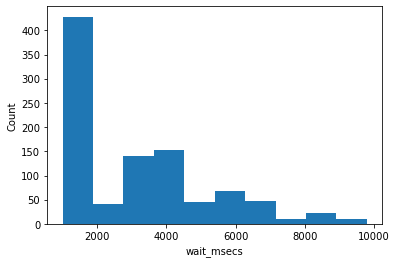

In [60]:
plt.hist(subset_one.wait_msecs)
plt.xlabel("wait_msecs",fontsize=10)
plt.ylabel("Count",fontsize=10)

This is the distribution of the wait_msecs

Text(0, 0.5, 'wait_msecs')

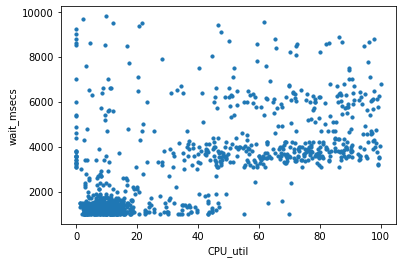

In [61]:
plt.scatter(subset_one.before_cpuutil_max, subset_one.wait_msecs, s = 10)
plt.xlabel("CPU_util",fontsize=10)
plt.ylabel("wait_msecs",fontsize=10)

From this graph, we see that there are 3 clear cluster available. The reason for this need further investigation.

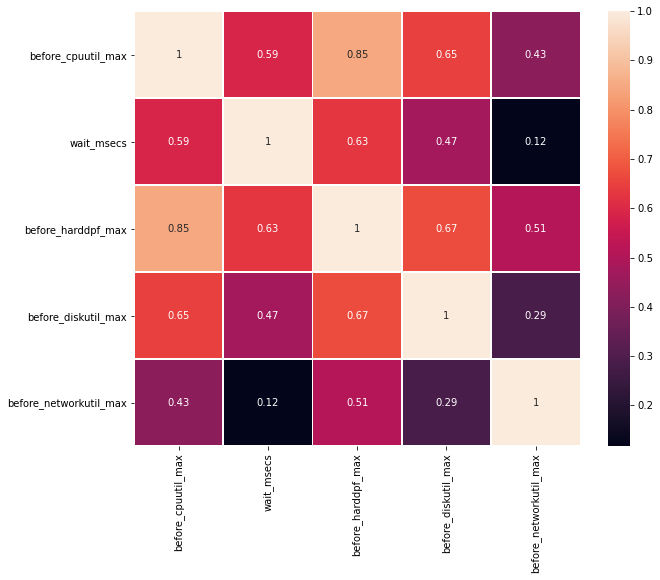

In [62]:
plt.figure(figsize=(10, 8))
sns.heatmap(subset_one.corr(), annot=True, linewidths=.5)

Before_cpuutil_max, before_harddpf_max, before_diskutil_max, before_networkutil_max all have positive correlation with our target varible wait_msecs

In [63]:
subset_one = subset_one.drop('before_networkutil_max', axis = 1)

In [64]:
subset_one = subset_one.apply(lambda x: x.apply(lambda y: 0 if y < 0 else y))

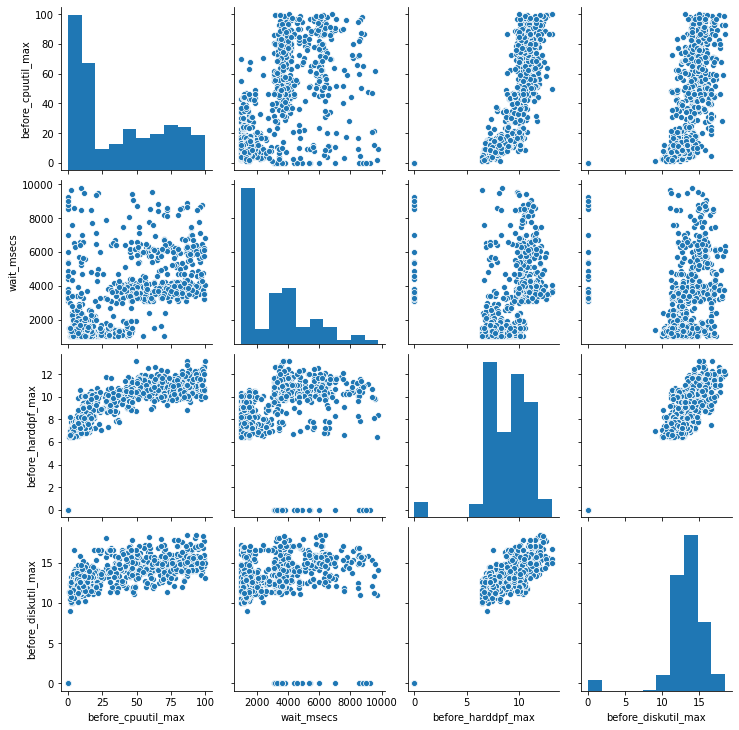

In [65]:
sns.pairplot(subset_one)

In [66]:
subset_one.before_harddpf_max[subset_one.before_harddpf_max < 7].value_counts(bins = 10)

(6.3, 7.0]       89
(-0.008, 0.7]    27
(5.6, 6.3]        0
(4.9, 5.6]        0
(4.2, 4.9]        0
(3.5, 4.2]        0
(2.8, 3.5]        0
(2.1, 2.8]        0
(1.4, 2.1]        0
(0.7, 1.4]        0
Name: before_harddpf_max, dtype: int64

In [68]:
subset_one = subset_one[subset_one['before_harddpf_max'] > 5]
subset_one = subset_one[subset_one['before_diskutil_max'] > 5]

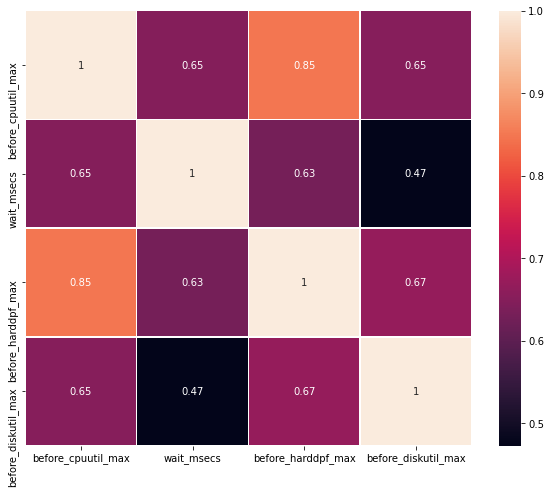

In [69]:
plt.figure(figsize=(10, 8))
sns.heatmap(subset_one.corr(), annot=True, linewidths=.5)

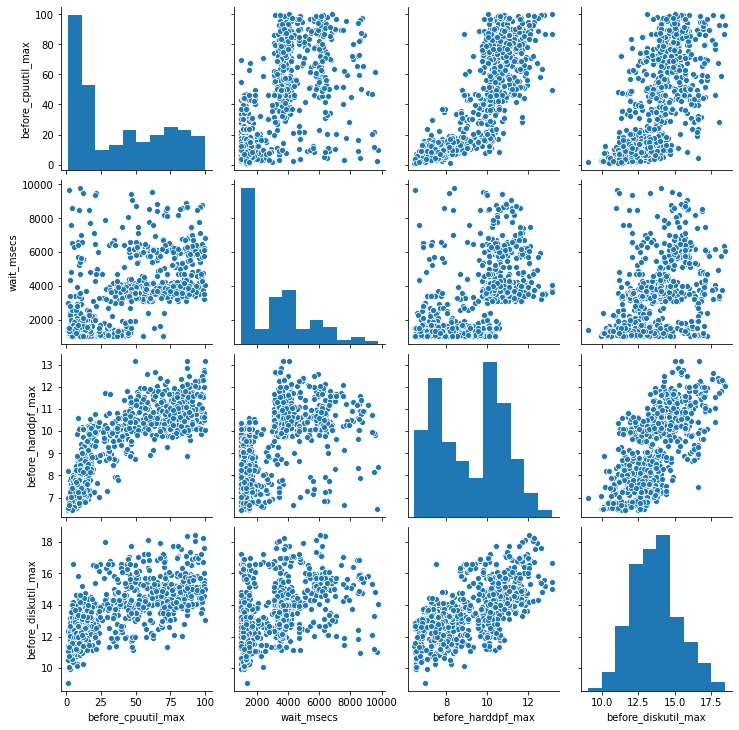

In [70]:
sns.pairplot(subset_one)

Text(0, 0.5, 'wait_msecs')

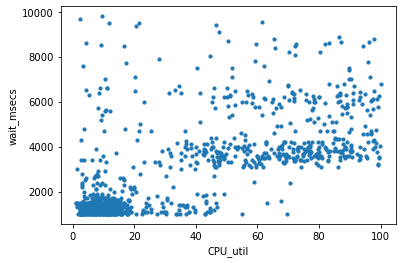

In [71]:
plt.scatter(subset_one.before_cpuutil_max, subset_one.wait_msecs, s = 10)
plt.xlabel("CPU_util",fontsize=10)
plt.ylabel("wait_msecs",fontsize=10)

<IPython.core.display.Javascript object>


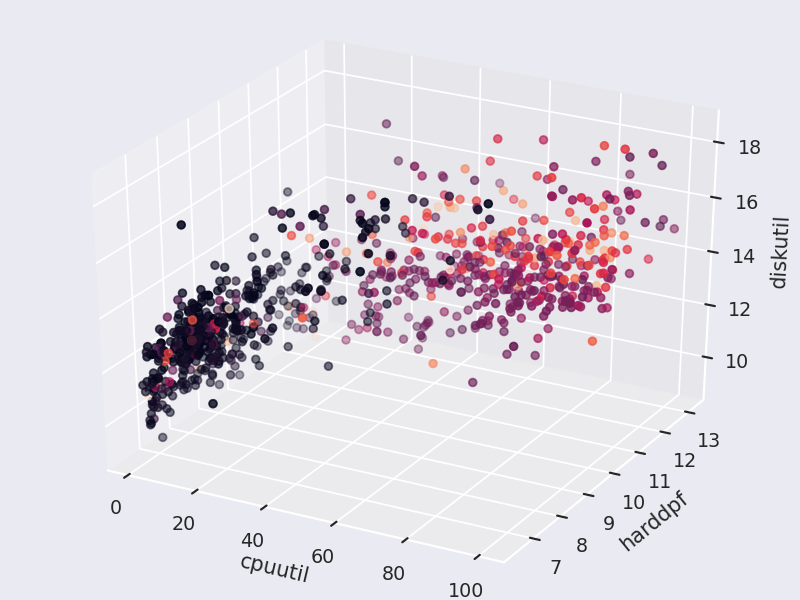

In [72]:
%matplotlib notebook
sns.set(style = "darkgrid")

fig = plt.figure()
ax = Axes3D(fig)

x = subset_one.before_cpuutil_max
y = subset_one.before_harddpf_max
z = subset_one.before_diskutil_max


ax.scatter(x, y, z, c=subset_one.wait_msecs, marker='o')
ax.set_xlabel('cpuutil')
ax.set_ylabel('harddpf')
ax.set_zlabel('diskutil')

plt.show()

## Mousewait

In [2]:
def dataframe(filename, delimiter = None):
    return dd.read_csv(filename, sep=delimiter, compression='gzip', error_bad_lines=False)
def dataframe2(filename, delimiter = None):
    return pd.read_csv(filename, sep=delimiter, nrows = 3000000, compression='gzip', error_bad_lines=False)

In [3]:
from os.path import expanduser
from pathlib import Path
home = str(Path.home())
filepath = home+'/teams/DSC180A_FA20_A00/b09systemusagereporting/dataset'
mousewait = dataframe2(filepath+'/mousewait_all.csv001.gz', '\x01')
mousewait.head()

,load_ts,batch_id,audit_zip,audit_internal_path,guid,interval_start_utc,interval_end_utc,interval_local_start,interval_local_end,ts,...,after_cpuutil_max,after_harddpf_mean,after_harddpf_min,after_harddpf_max,after_diskutil_mean,after_diskutil_min,after_diskutil_max,after_networkutil_mean,after_networkutil_min,after_networkutil_max
0,2020-02-17 04:14:15,20200216-200527,2020021515-i-0728cf8ab79db9e58-0PQzvFr53c0KKhn...,V8WAIT_20200215225003.V8,ec601c5d312847a68f2346944dbf7433,2020-02-14 15:49:11,2020-02-15 15:51:30,2020-02-14 22:49:11,2020-02-15 22:51:30,2020-02-14 23:06:07,...,63.653845,32975.522486,14414.729578,109379.546298,6.996697e+06,4.424675e+06,1.669766e+07,160113.666050,10555.214421,7.005273e+05
1,2020-02-17 04:14:15,20200216-200527,2020021515-i-0728cf8ab79db9e58-0PQzvFr53c0KKhn...,V8WAIT_20200215225003.V8,ec601c5d312847a68f2346944dbf7433,2020-02-14 15:49:11,2020-02-15 15:51:30,2020-02-14 22:49:11,2020-02-15 22:51:30,2020-02-14 23:36:14,...,52.734400,23418.144640,1118.973930,78629.416961,1.603042e+06,1.966386e+04,8.046177e+06,10087.796235,2286.012122,1.363990e+04
2,2020-02-17 04:14:15,20200216-200527,2020021515-i-0728cf8ab79db9e58-0PQzvFr53c0KKhn...,V8WAIT_20200215225003.V8,ec601c5d312847a68f2346944dbf7433,2020-02-14 15:49:11,2020-02-15 15:51:30,2020-02-14 22:49:11,2020-02-15 22:51:30,2020-02-15 00:17:33,...,58.965876,23912.363263,1737.067429,116903.898039,2.141939e+06,3.277305e+04,9.064737e+06,12314.223147,8185.584133,2.340836e+04
3,2020-02-17 04:14:15,20200216-200527,2020021515-i-0728cf8ab79db9e58-0PQzvFr53c0KKhn...,V8WAIT_20200215225003.V8,ec601c5d312847a68f2346944dbf7433,2020-02-14 15:49:11,2020-02-15 15:51:30,2020-02-14 22:49:11,2020-02-15 22:51:30,2020-02-15 00:53:26,...,34.951303,21957.671636,530.575343,113020.664224,1.552810e+06,3.153773e+04,6.460560e+06,8264.801956,2176.351066,1.344384e+04
4,2020-02-17 04:14:15,20200216-200527,2020021515-i-0728cf8ab79db9e58-0PQzvFr53c0KKhn...,V8WAIT_20200215225003.V8,ec601c5d312847a68f2346944dbf7433,2020-02-14 15:49:11,2020-02-15 15:51:30,2020-02-14 22:49:11,2020-02-15 22:51:30,2020-02-15 21:02:01,...,64.355809,46216.966367,22111.284672,110219.798541,6.959890e+06,2.837489e+06,1.672723e+07,474115.187358,22557.075868,2.653365e+06


In [4]:
mousewait.shape

(3000000, 36)

In [5]:
# Checking the missing values
mousewait.isnull().any()

load_ts                    False
batch_id                   False
audit_zip                  False
audit_internal_path        False
guid                       False
interval_start_utc         False
interval_end_utc           False
interval_local_start       False
interval_local_end         False
ts                         False
dt                         False
wait_msecs                 False
before_cpuutil_mean        False
before_cpuutil_min         False
before_cpuutil_max         False
before_harddpf_mean        False
before_harddpf_min         False
before_harddpf_max         False
before_diskutil_mean       False
before_diskutil_min        False
before_diskutil_max        False
before_networkutil_mean    False
before_networkutil_min     False
before_networkutil_max     False
after_cpuutil_mean         False
after_cpuutil_min          False
after_cpuutil_max          False
after_harddpf_mean         False
after_harddpf_min          False
after_harddpf_max          False
after_disk

Text(0.5, 1.0, 'Guid Count in mousewait_all')

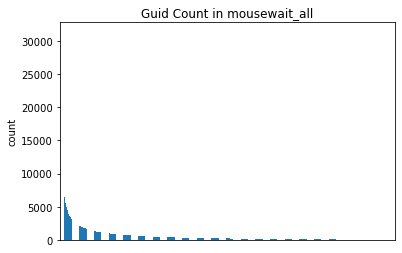

In [6]:
guid = mousewait.guid.value_counts().plot(kind = 'bar')
guid.axes.get_xaxis().set_visible(False)
plt.ylabel("count")
plt.title("Guid Count in mousewait_all")

In [7]:
#wait time for each guid and batch_id
mousewait.groupby(["guid", "batch_id"])[['wait_msecs']].count()

wait_msecs
guid                             batch_id                   
0121379f76714a03823c02777d689676 20200505-200228        2395
                                 20200507-200228        9296
                                 20200508-200252        4591
                                 20200509-200228        2670
                                 20200511-200325        1685
...                                                      ...
ffeb9e5c63004a58bcb556891bc46332 20210112-190326           8
                                 20210113-190228          26
                                 20210114-190233           3
                                 20210115-190232           8
                                 20210119-190228          13

[259704 rows x 1 columns]

In [8]:
# new key to identify each batch_id for each guid
mousewait['key'] = mousewait['guid'] + " " + mousewait['batch_id']

In [9]:
mean_mw = mousewait.groupby('key')[['after_networkutil_mean', \
                                       'before_networkutil_mean', \
                                       'after_diskutil_mean', \
                                       'before_diskutil_mean', \
                                       'after_cpuutil_mean', \
                                       'before_cpuutil_mean', 'wait_msecs']].mean()

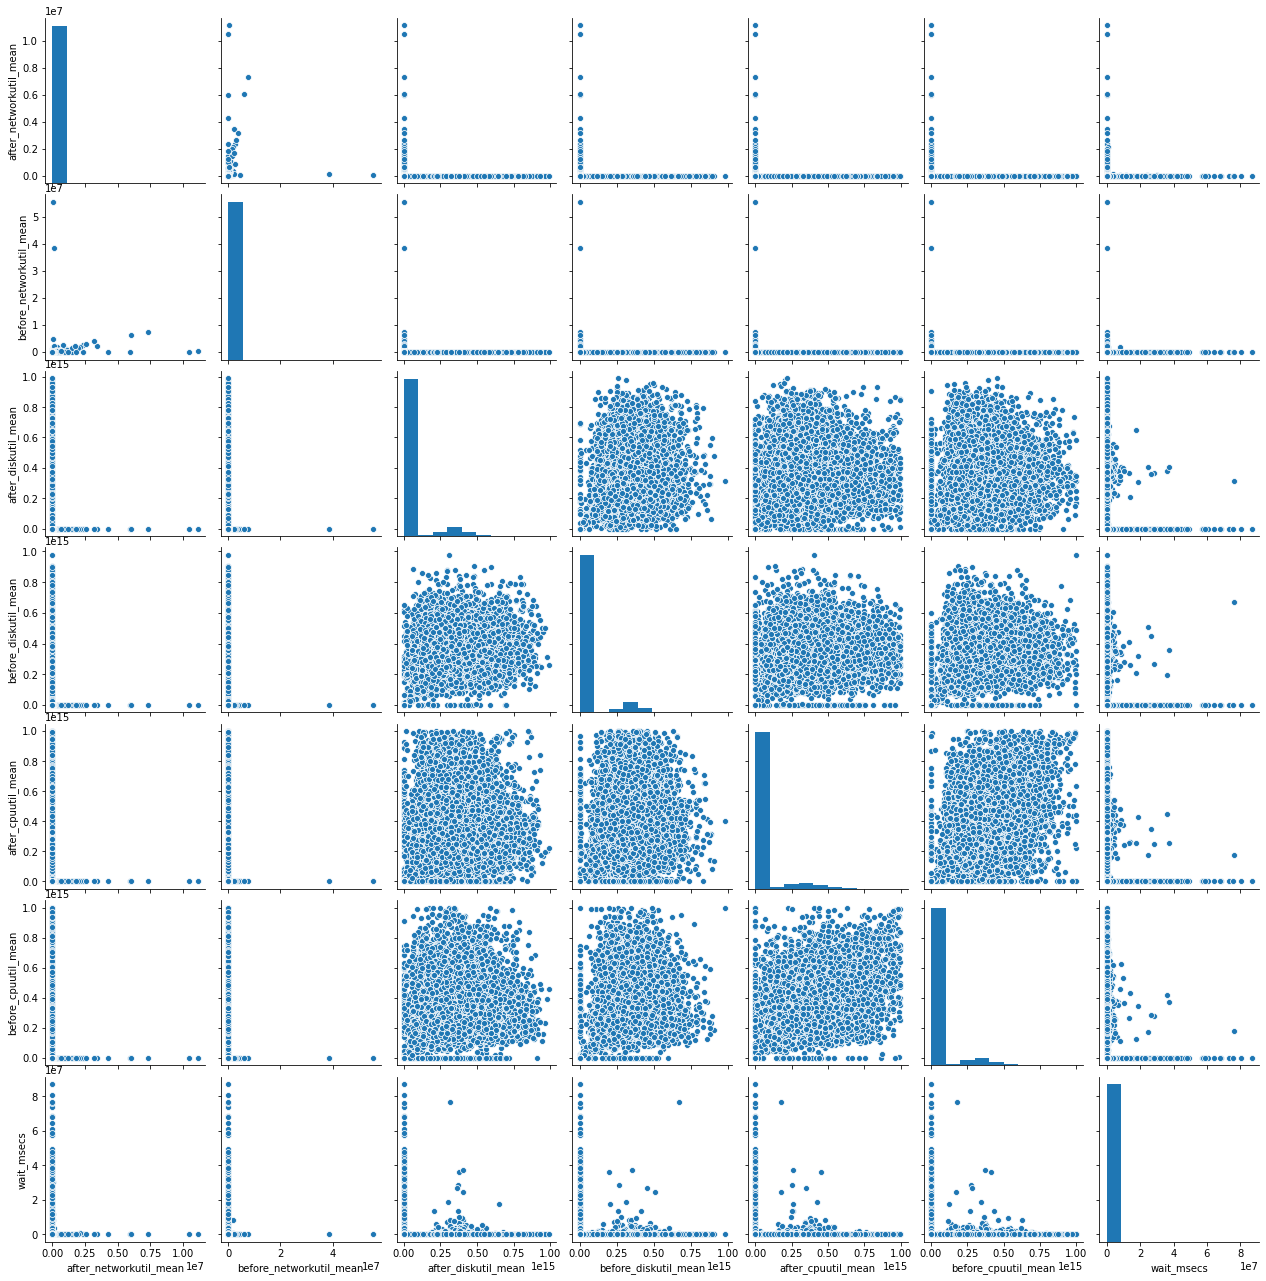

In [10]:
%matplotlib inline
sns.pairplot(mean_mw)

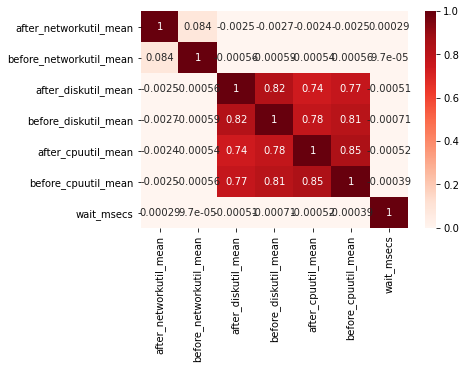

In [11]:
sns.heatmap(mousewait[['after_networkutil_mean', \
                                       'before_networkutil_mean', \
                                       'after_diskutil_mean', \
                                       'before_diskutil_mean', \
                                       'after_cpuutil_mean', \
                                       'before_cpuutil_mean', 'wait_msecs']].corr(), annot=True, cmap = 'Reds')

In [12]:
mousewait['wait_msecs'].value_counts()

1100       90680
1200       74505
1300       61086
1500       54167
1400       51033
           ...  
225087         1
55112          1
46080          1
6211533        1
46111          1
Name: wait_msecs, Length: 62561, dtype: int64

In [13]:
# yscale wait time
mousewait['yscaled_wait'] = [math.log(x) for x in mousewait['wait_msecs']]

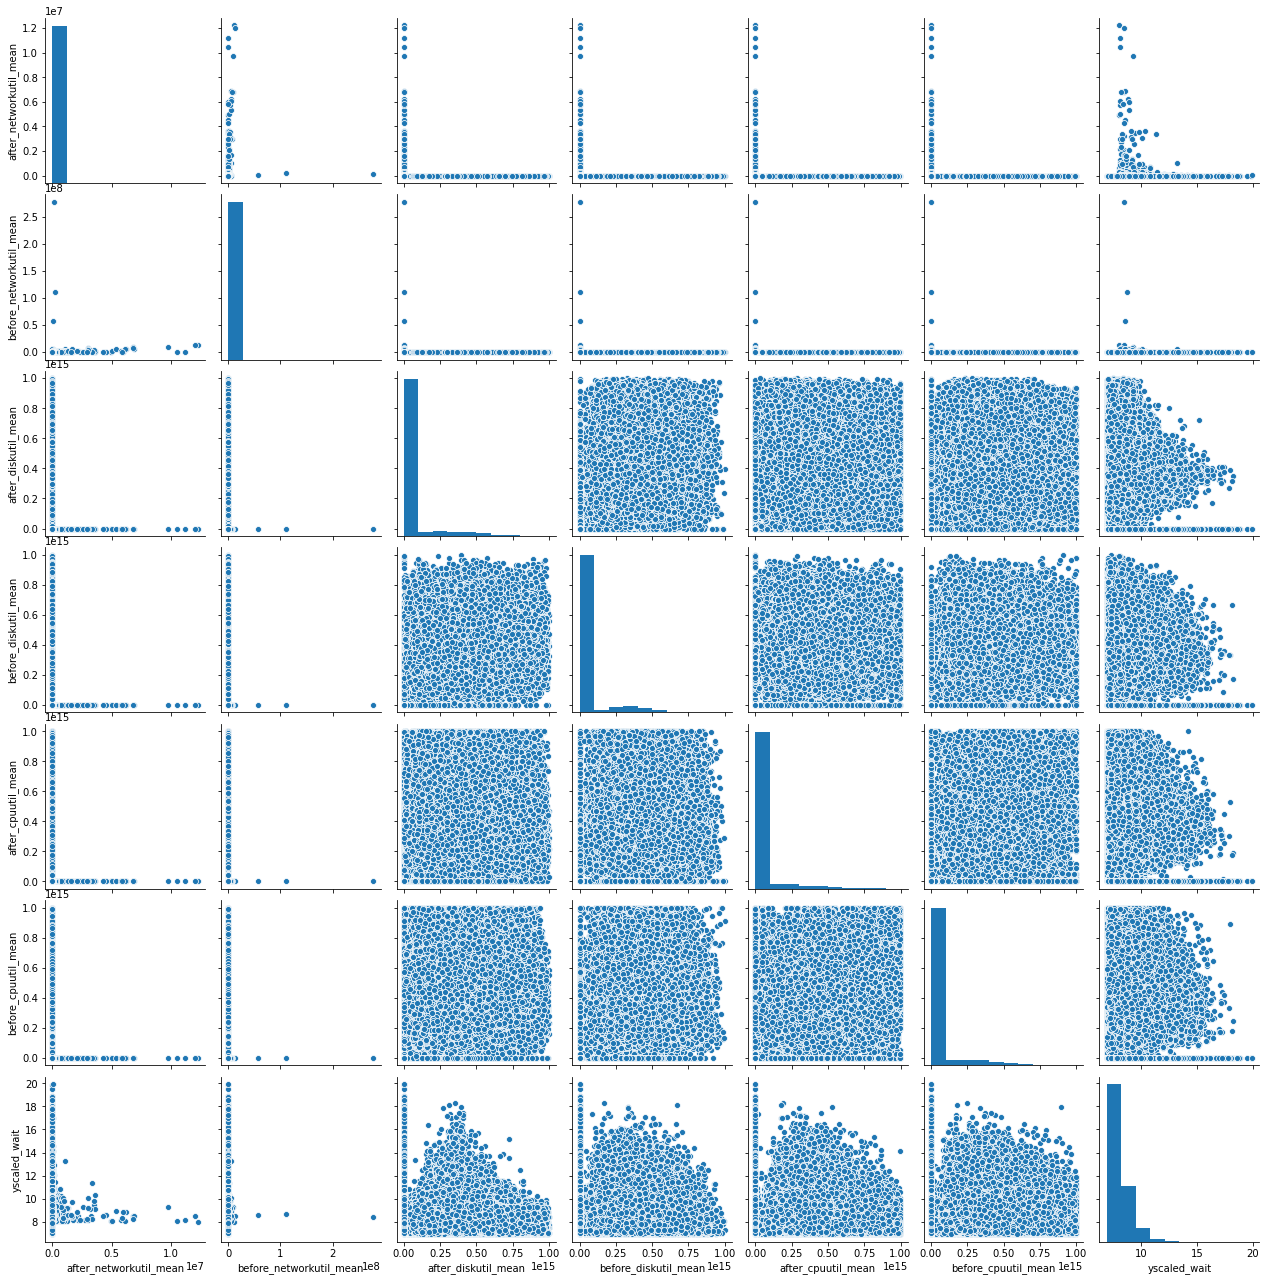

In [14]:
sns.pairplot(mousewait[['after_networkutil_mean', \
                                       'before_networkutil_mean', \
                                       'after_diskutil_mean', \
                                       'before_diskutil_mean', \
                                       'after_cpuutil_mean', \
                                       'before_cpuutil_mean', 'yscaled_wait']])

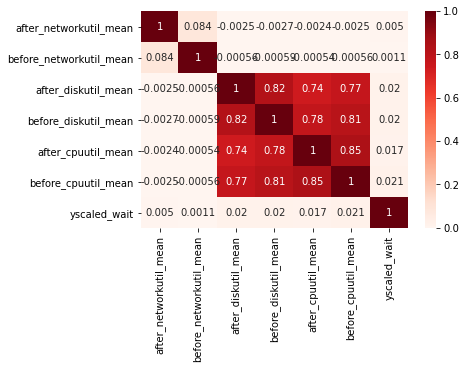

In [15]:
sns.heatmap(mousewait[['after_networkutil_mean', \
                                       'before_networkutil_mean', \
                                       'after_diskutil_mean', \
                                       'before_diskutil_mean', \
                                       'after_cpuutil_mean', \
                                       'before_cpuutil_mean', 'yscaled_wait']].corr(), annot=True, cmap = 'Reds')

In [16]:
# y scale both wait time and other factors
mousewait['log_after_networkutil_mean'] = np.log(mousewait['after_networkutil_mean'])
mousewait['log_before_networkutil_mean'] = np.log(mousewait['before_networkutil_mean'])
mousewait['log_after_diskutil_mean'] = np.log(mousewait['after_diskutil_mean'])
mousewait['log_before_diskutil_mean'] = np.log(mousewait['before_diskutil_mean'])
mousewait['log_after_cpuutil_mean'] = np.log(mousewait['after_cpuutil_mean'])
mousewait['log_before_cpuutil_mean'] = np.log(mousewait['before_cpuutil_mean'])

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [17]:
mousewait = mousewait.replace([float('-inf') ], -2)

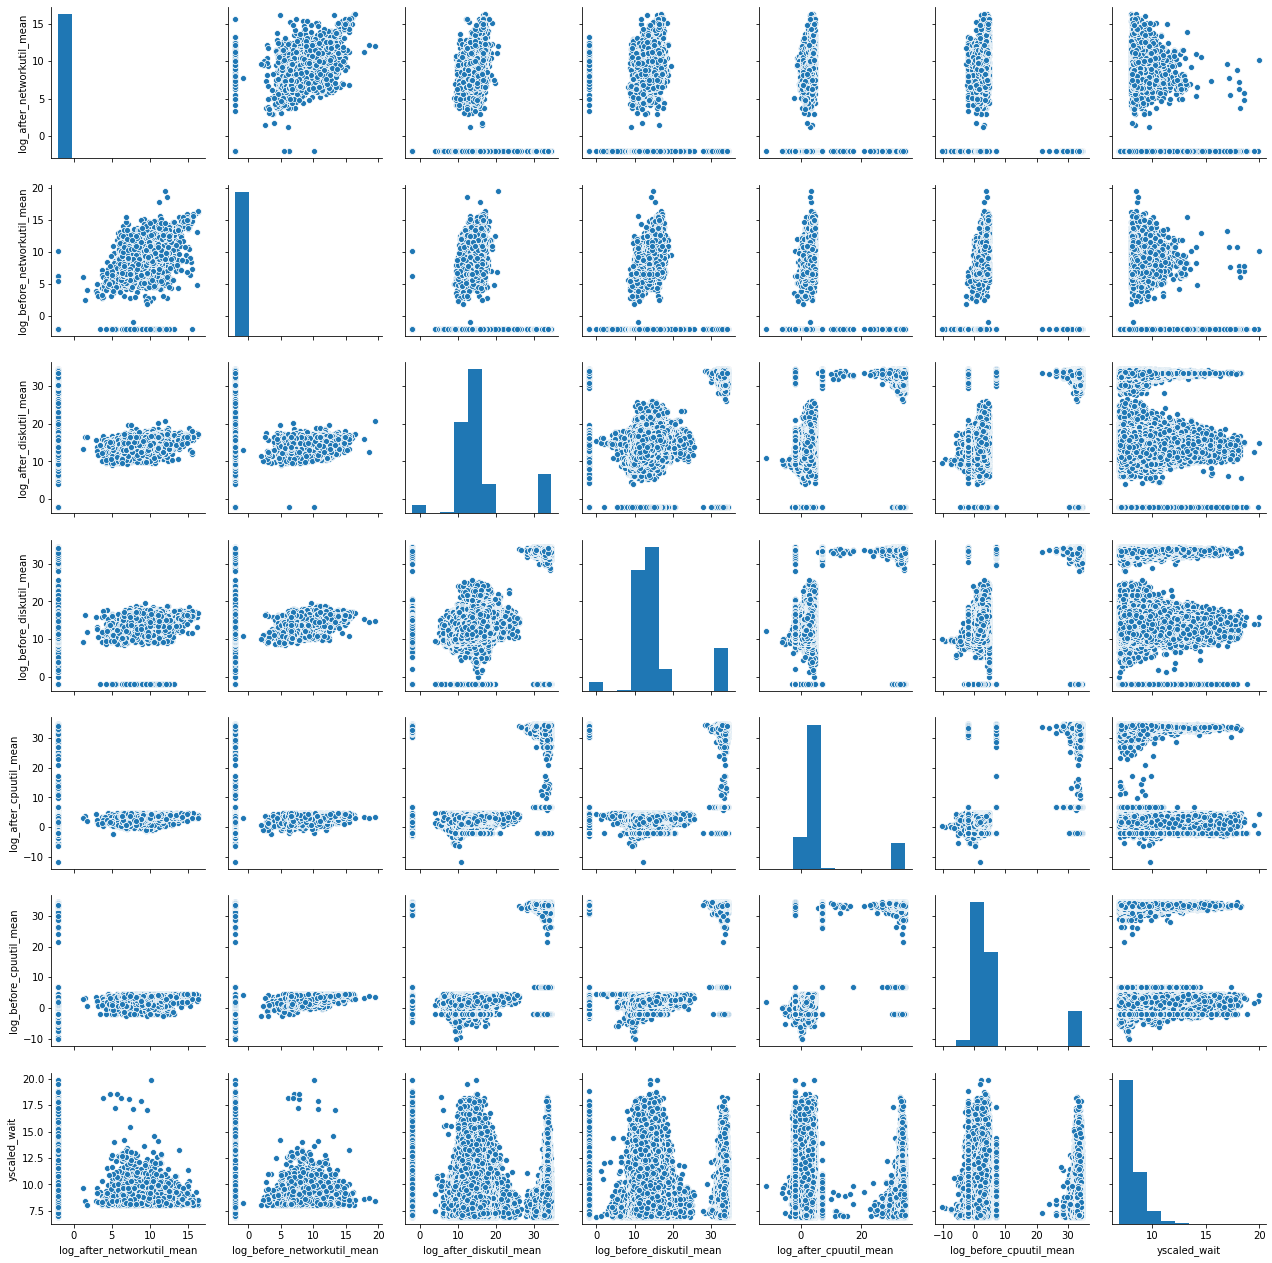

In [18]:
sns.pairplot(mousewait[['log_after_networkutil_mean', \
                                       'log_before_networkutil_mean', \
                                       'log_after_diskutil_mean', \
                                       'log_before_diskutil_mean', \
                                       'log_after_cpuutil_mean', \
                                       'log_before_cpuutil_mean', 'yscaled_wait']])

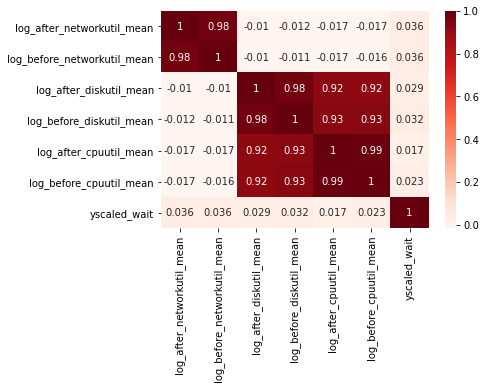

In [19]:
sns.heatmap(mousewait[['log_after_networkutil_mean', \
                                       'log_before_networkutil_mean', \
                                       'log_after_diskutil_mean', \
                                       'log_before_diskutil_mean', \
                                       'log_after_cpuutil_mean', \
                                       'log_before_cpuutil_mean', 'yscaled_wait']].corr(), annot=True, cmap = 'Reds')

In [20]:
mousewait['networkutil_diff'] = mousewait['before_networkutil_mean'] - mousewait['after_networkutil_mean']
mousewait['diskutil_diff'] = mousewait['before_diskutil_mean'] - mousewait['after_diskutil_mean']
mousewait['cpuutil_diff'] = mousewait['before_cpuutil_mean'] - mousewait['after_cpuutil_mean']

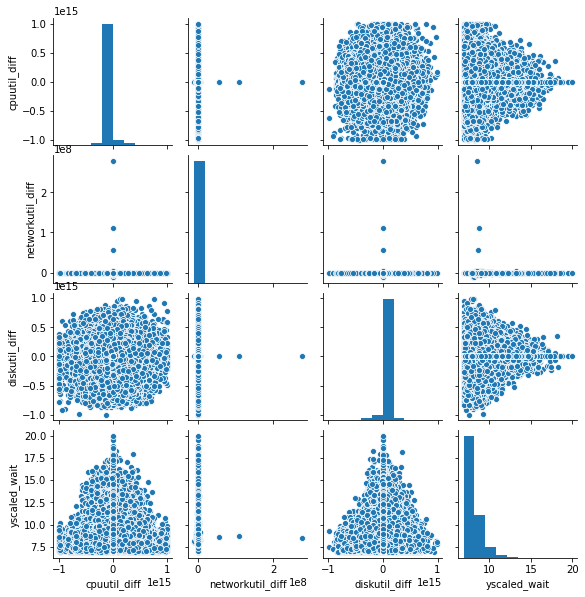

In [21]:
sns.pairplot(mousewait[['cpuutil_diff', 'networkutil_diff', 'diskutil_diff', 'yscaled_wait']], height = 2)